In [1]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

In [2]:
plt.style.use('seaborn')

In [3]:
# Method 1

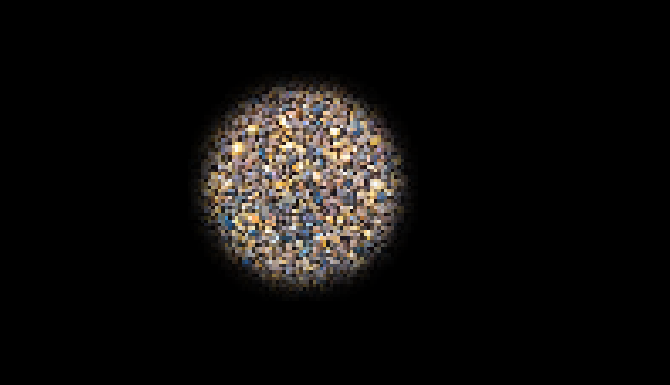

In [6]:
#img = cv2.imread('/content/sample_data/image_org_1.PNG')
img = cv2.imread('/content/sample_data/image_org_1.PNG', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [7]:
dst = cv2.fastNlMeansDenoisingColored(img, None, 11, 6, 7, 21)

In [8]:
print (img.shape)

(385, 670, 4)


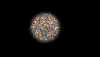

In [9]:
r = 100.0 / img.shape[1]
dim = (100, int(img.shape[0] * r))
# perform the actual resizing of the image and show it
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#resized_img = cv2.imread(resized, cv2.IMREAD_UNCHANGED)
cv2_imshow(resized)

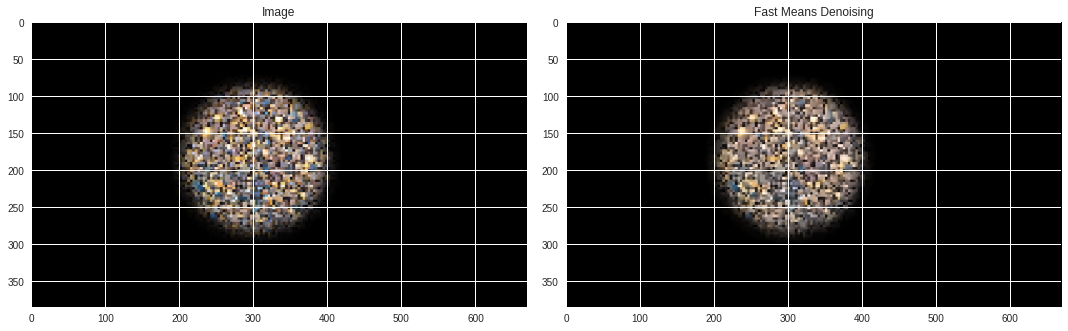

In [10]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Image')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()

In [11]:
# Method 2

In [12]:
from skimage import io, img_as_float
from scipy import ndimage as nd

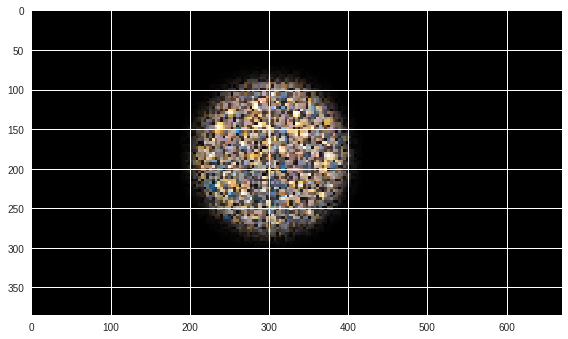

In [13]:
image=img_as_float(io.imread('/content/sample_data/image_org_1.PNG'))
io.imshow(image)

In [35]:
gaussian_img = nd.gaussian_filter(image,sigma =2)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


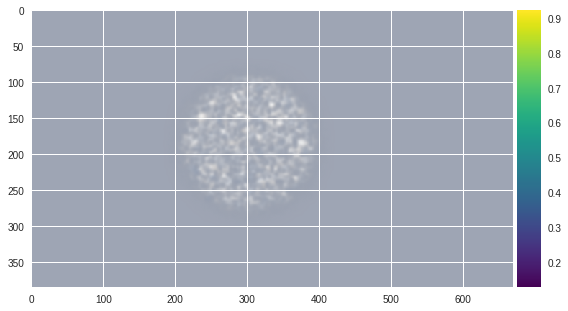

In [36]:
plt.imsave('/content/sample_data/gaussian.PNG',gaussian_img)
io.imshow(gaussian_img)

In [16]:
median_img = nd.median_filter(image,size = 3)
plt.imsave('/content/sample_data/median_img.PNG',median_img)

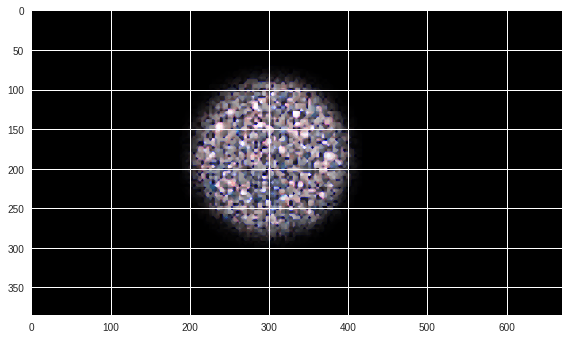

In [17]:
io.imshow(median_img)

In [18]:
# Method 3

In [19]:
from skimage.restoration import denoise_nl_means, estimate_sigma

In [20]:
sigma_est = np.mean(estimate_sigma(image))
nlm = denoise_nl_means(image,h = 1.15*sigma_est,fast_mode=False,patch_size=5,patch_distance = 3,multichannel=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: image is size 4 on the last axis, but multichannel is False.  If this is a color image, please set multichannel to True for proper noise estimation.
  """Entry point for launching an IPython kernel.


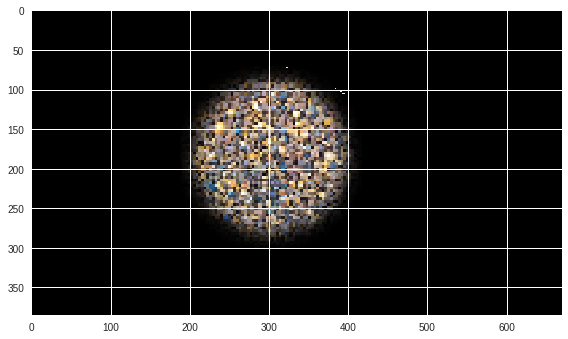

In [21]:
plt.imsave('/content/sample_data/nlm.PNG',nlm)
io.imshow(nlm)

In [22]:
# Method 4

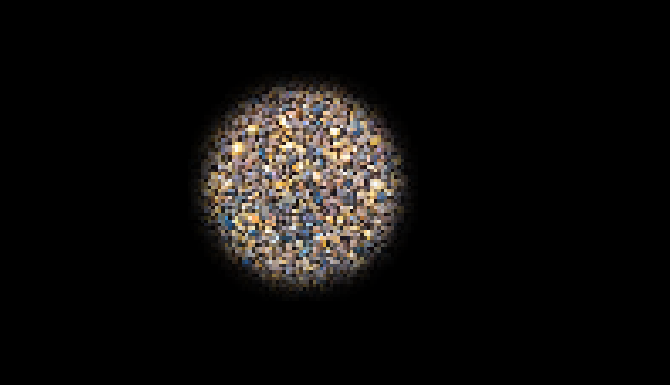

In [23]:
img4 = cv2.imread('/content/sample_data/image_org_1.PNG')
cv2_imshow(img4)

In [24]:
averaging = cv2.blur(img4,(5,5))
gaussian = cv2.GaussianBlur(img4,(5,5),0)
median = cv2.medianBlur(img4,5)

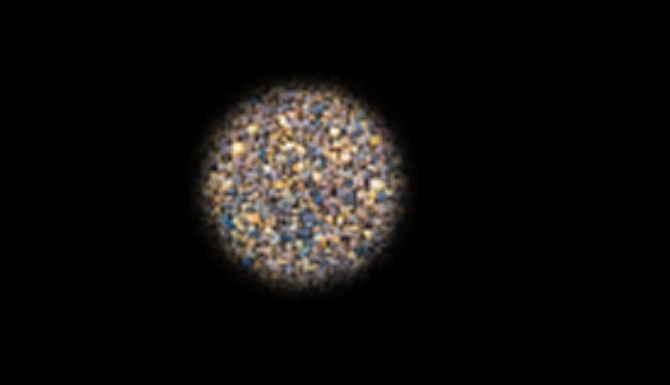

In [25]:
cv2_imshow(averaging)

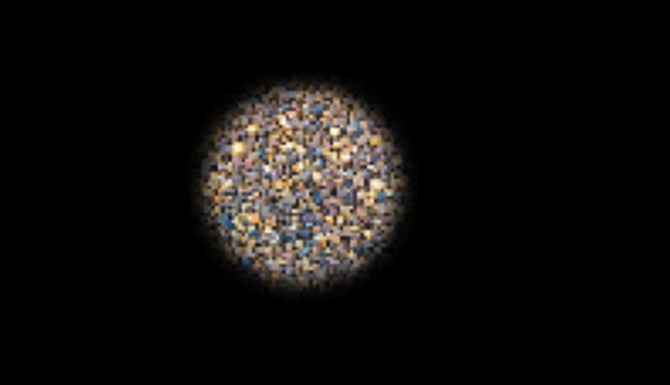

In [26]:
cv2_imshow(gaussian)

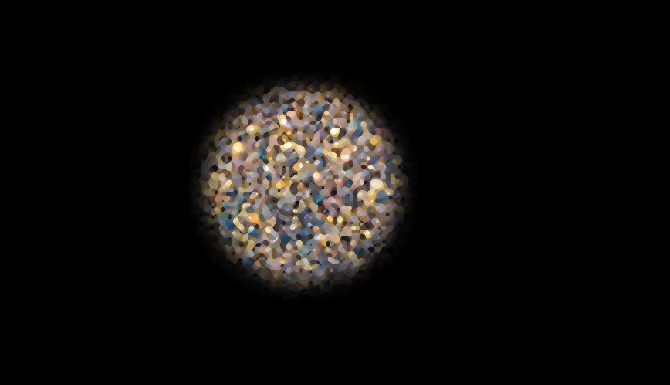

In [27]:
cv2_imshow(median)

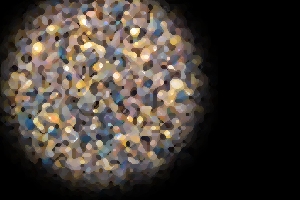

In [28]:
img_crop = median[100:300,200:500]
cv2_imshow(img_crop)